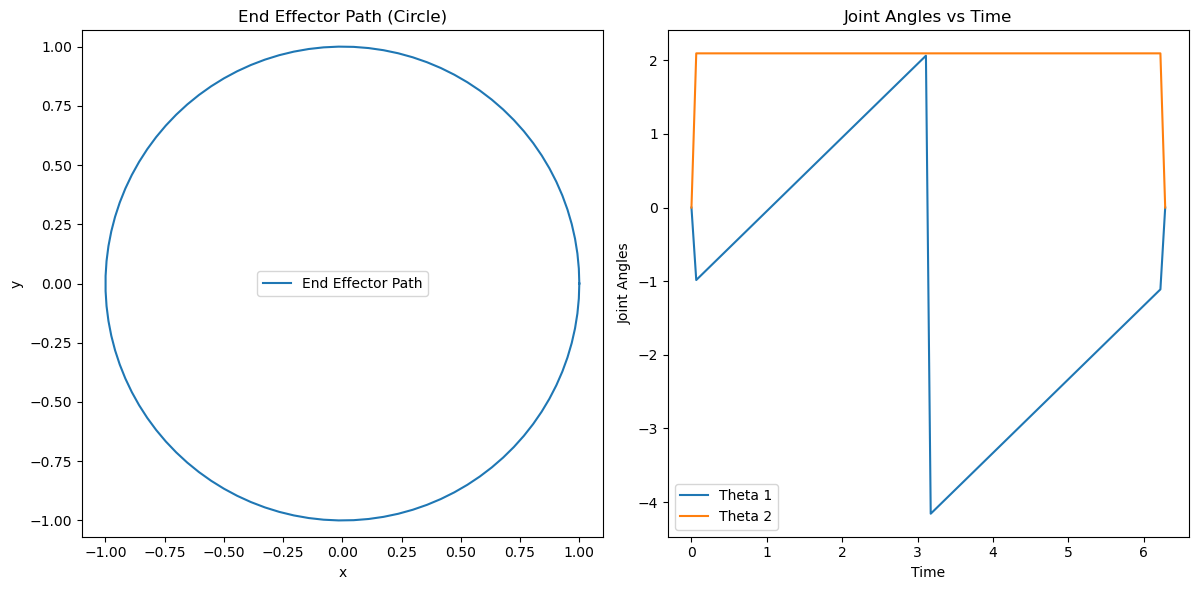

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the circle
r = 1.0  # radius of the circle
T = 2 * np.pi  # total time duration
omega = 2 * np.pi / T  # angular frequency

# Link lengths of the manipulator
l1 = 1.0  # length of the first link
l2 = 1.0  # length of the second link

# Time discretization
N = 100  # number of time steps
t = np.linspace(0, T, N)

# Parametric equations for the circle
x = r * np.cos(omega * t)
y = r * np.sin(omega * t)

# Initialize arrays to store joint angles
theta1 = np.zeros(N)
theta2 = np.zeros(N)

# Inverse Kinematics Calculation
for i in range(N):
    # Calculate theta2 using cosine law
    c2 = (x[i]**2 + y[i]**2 - l1**2 - l2**2) / (2 * l1 * l2)
    s2 = np.sqrt(1 - c2**2)  # since we know s2^2 + c2^2 = 1

    theta2[i] = np.arctan2(s2, c2)

    # Calculate theta1 using geometry
    k1 = l1 + l2 * c2
    k2 = l2 * s2
    theta1[i] = np.arctan2(y[i], x[i]) - np.arctan2(k2, k1)

# Ensure the constraints are satisfied at t=0 and t=T
theta1[0] = 0
theta2[0] = 0
theta1[-1] = 0
theta2[-1] = 0

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the end effector path
plt.subplot(1, 2, 1)
plt.plot(x, y, label='End Effector Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('End Effector Path (Circle)')
plt.axis('equal')
plt.legend()

# Plot joint angles over time
plt.subplot(1, 2, 2)
plt.plot(t, theta1, label='Theta 1')
plt.plot(t, theta2, label='Theta 2')
plt.xlabel('Time')
plt.ylabel('Joint Angles')
plt.title('Joint Angles vs Time')
plt.legend()

plt.tight_layout()
plt.show()


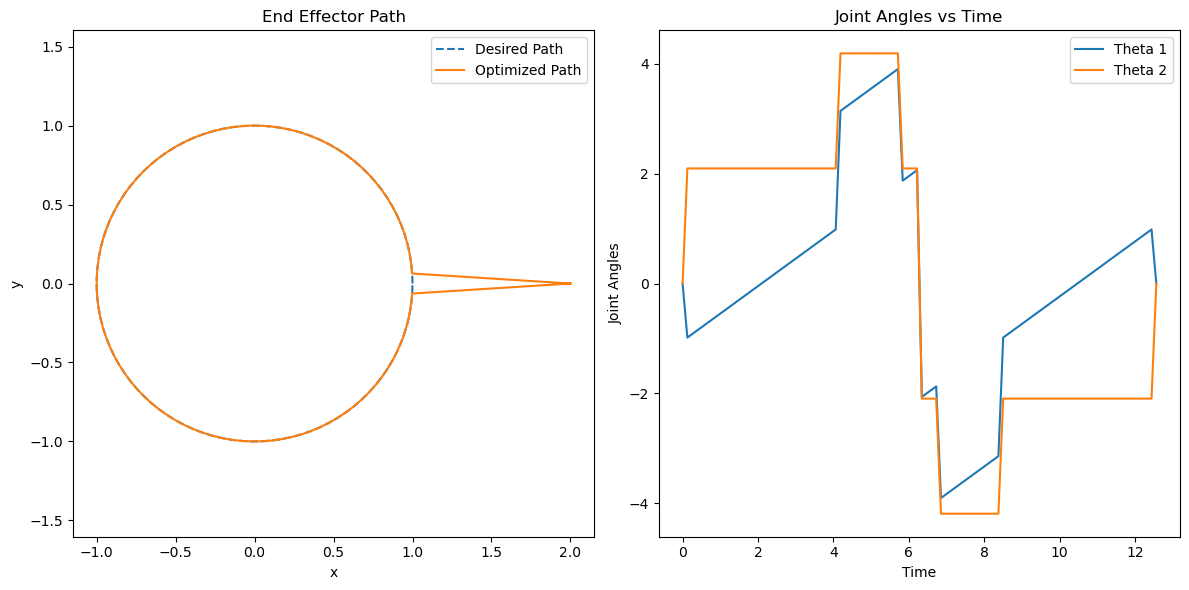

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters for the circle
r = 1.0  # radius of the circle
T = 2 * np.pi  # total time duration
omega = 2 * np.pi / T  # angular frequency: ω=1: This indicates that the circle is completed once every T seconds. 


# Link lengths of the manipulator
l1 = 1.0  # length of the first link
l2 = 1.0  # length of the second link

# Time discretization
N = 100  # number of time steps
t = np.linspace(0, T, N)

# Parametric equations for the circle
x = r * np.cos(omega * t)
y = r * np.sin(omega * t)

# Objective function: minimize the difference between current and desired positions
def objective(thetas):
    theta1, theta2 = thetas[:N], thetas[N:]
    # Forward kinematics
    x_end = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
    y_end = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)
    # Compute the error
    error = np.sum((x_end - x)**2 + (y_end - y)**2)
    return error

# Constraints
def constraint_initial_final(thetas):
    # Constraint: initial and final angles should be zero
    return [thetas[0], thetas[N-1], thetas[N], thetas[2*N-1]]

# Initial guess
theta1_guess = np.linspace(0, 0, N)
theta2_guess = np.linspace(0, 0, N)
thetas_guess = np.concatenate((theta1_guess, theta2_guess))

# Constraints as a dictionary
constraints = {'type': 'eq', 'fun': constraint_initial_final}

# Perform optimization
result = minimize(objective, thetas_guess, constraints=constraints, method='SLSQP')

# Extract optimized joint angles
theta1_opt = result.x[:N]
theta2_opt = result.x[N:]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the end effector path
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Desired Path', linestyle='dashed')
x_opt = l1 * np.cos(theta1_opt) + l2 * np.cos(theta1_opt + theta2_opt)
y_opt = l1 * np.sin(theta1_opt) + l2 * np.sin(theta1_opt + theta2_opt)
plt.plot(x_opt, y_opt, label='Optimized Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('End Effector Path')
plt.axis('equal')
plt.legend()

# Plot joint angles over time
plt.subplot(1, 2, 2)
plt.plot(t, theta1_opt, label='Theta 1')
plt.plot(t, theta2_opt, label='Theta 2')
plt.xlabel('Time')
plt.ylabel('Joint Angles')
plt.title('Joint Angles vs Time')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters for the circle
r = 1.0  # radius of the circle
T = 2 * np.pi  # total time duration
omega = 2 * np.pi / T  # angular frequency

# Link lengths of the manipulator
l1 = 1.0  # length of the first link
l2 = 1.0  # length of the second link

# Time discretization
N = 1000  # number of time steps
t = np.linspace(0, T, N)

# Parametric equations for the circle
x = r * np.cos(omega * t)
y = r * np.sin(omega * t)

# Define center point constraint (e.g., at t = T/2)
center_time_index = N // 2  # Midpoint index
x_c, y_c = 0.0, 0.0  # Coordinates of the center point

# Objective function: minimize the difference between current and desired positions
def objective(thetas):
    theta1, theta2 = thetas[:N], thetas[N:]
    # Forward kinematics
    x_end = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
    y_end = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)
    # Compute the error
    error = np.sum((x_end - x)**2 + (y_end - y)**2)
    return error

# Constraints
def constraint_initial_final(thetas):
    # Constraint: initial and final angles should be zero
    return [thetas[0], thetas[N-1], thetas[N], thetas[2*N-1]]

def constraint_center_point(thetas):
    theta1, theta2 = thetas[:N], thetas[N:]
    # Forward kinematics at center point time
    x_mid = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
    y_mid = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)
    # Constraint: end effector must be at (x_c, y_c) at midpoint
    return [x_mid - x_c, y_mid - y_c]

# Initial guess
theta1_guess = np.linspace(0, 0, N)
theta2_guess = np.linspace(0, 0, N)
thetas_guess = np.concatenate((theta1_guess, theta2_guess))

# Constraints as a dictionary
constraints = [
    {'type': 'eq', 'fun': constraint_initial_final},
    {'type': 'eq', 'fun': constraint_center_point}
]

# Perform optimization
result = minimize(objective, thetas_guess, constraints=constraints, method='SLSQP')

# Extract optimized joint angles
theta1_opt = result.x[:N]
theta2_opt = result.x[N:]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the end effector path
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Desired Path', linestyle='dashed')
x_opt = l1 * np.cos(theta1_opt) + l2 * np.cos(theta1_opt + theta2_opt)
y_opt = l1 * np.sin(theta1_opt) + l2 * np.sin(theta1_opt + theta2_opt)
plt.plot(x_opt, y_opt, label='Optimized Path')
plt.scatter([x_c], [y_c], color='red', label='Center Point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('End Effector Path')
plt.axis('equal')
plt.legend()

# Plot joint angles over time
plt.subplot(1, 2, 2)
plt.plot(t, theta1_opt, label='Theta 1')
plt.plot(t, theta2_opt, label='Theta 2')
plt.xlabel('Time')
plt.ylabel('Joint Angles')
plt.title('Joint Angles vs Time')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)